In [1]:
from sqlalchemy import create_engine
import os
from dotenv import load_dotenv

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
import datetime as dt

In [3]:
load_dotenv("coffee_db.env")
CONN= os.getenv('SQL_CONN')

In [4]:
try:
    engine = create_engine(CONN)
except Exception as e:
    print(e)

In [5]:
tables_query = "SELECT TABLE_NAME FROM INFORMATION_SCHEMA.TABLES WHERE TABLE_TYPE = 'BASE TABLE'"

In [6]:
tables=pd.read_sql(tables_query,engine)['TABLE_NAME'].tolist()

In [7]:
tables

['DimSalesTerritory',
 'DimCustomer',
 'DimDate',
 'DimGeography',
 'DimProduct',
 'FactInternetSales']

In [8]:
DataFrame={}
for table in tables:
    try:
        df=pd.read_sql(f"SELECT * FROM {table}",engine)
        DataFrame[table] = pd.DataFrame(df)
        print(f"Đã import thành công {table}: {len(df)} dòng")
    except Exception as e:
        print(f"Có lỗ {e}")

Đã import thành công DimSalesTerritory: 11 dòng
Đã import thành công DimCustomer: 18484 dòng
Đã import thành công DimDate: 2191 dòng
Đã import thành công DimGeography: 655 dòng
Đã import thành công DimProduct: 606 dòng
Đã import thành công FactInternetSales: 60398 dòng


In [15]:
for name, df in DataFrame.items():
    globals()[f"df_{name}"]=df
    print(f"Đã tạo thành công bảng {name}")

Đã tạo thành công bảng DimSalesTerritory
Đã tạo thành công bảng DimCustomer
Đã tạo thành công bảng DimDate
Đã tạo thành công bảng DimGeography
Đã tạo thành công bảng DimProduct
Đã tạo thành công bảng FactInternetSales


In [16]:
df_FactInternetSales=pd.DataFrame(df_FactInternetSales)

In [17]:
df_DimCustomer=pd.DataFrame(df_DimCustomer)

In [18]:
df_DimDate=pd.DataFrame(df_DimDate)
df_DimGeography=pd.DataFrame(df_DimGeography)
df_DimProduct =pd.DataFrame(df_DimProduct)
df_DimSalesTerritory=pd.DataFrame(df_DimSalesTerritory)

In [19]:
df_FactInternetSales.head(10)

,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,CustomerKey,PromotionKey,CurrencyKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,...,TaxAmt,Freight,CarrierTrackingNumber,CustomerPONumber,OrderDate,DueDate,ShipDate,Profit,Revenue,COGS
0,344,2005-07-22,2005-08-03,2005-07-29,11000,1,6,9,SO43793,1,...,272.00,85.00,None,None,2005-07-22,2005-08-03,2005-07-29,20829.76,47599.86,26770.10
1,353,2007-07-22,2007-08-03,2007-07-29,11000,2,6,9,SO51522,1,...,185.60,58.00,None,None,2007-07-22,2007-08-03,2007-07-29,1054.37,2319.99,1265.62
2,485,2007-07-22,2007-08-03,2007-07-29,11000,1,6,9,SO51522,2,...,1.76,0.55,None,None,2007-07-22,2007-08-03,2007-07-29,13.76,21.98,8.22
3,573,2007-11-04,2007-11-16,2007-11-11,11000,1,6,9,SO57418,1,...,190.73,59.60,None,None,2007-11-04,2007-11-16,2007-11-11,902.13,2384.07,1481.94
4,541,2007-11-04,2007-11-16,2007-11-11,11000,1,6,9,SO57418,2,...,2.32,0.72,None,None,2007-11-04,2007-11-16,2007-11-11,18.15,28.99,10.84
5,530,2007-11-04,2007-11-16,2007-11-11,11000,1,6,9,SO57418,3,...,0.40,0.12,None,None,2007-11-04,2007-11-16,2007-11-11,3.12,4.99,1.87
6,214,2007-11-04,2007-11-16,2007-11-11,11000,1,6,9,SO57418,4,...,2.80,0.87,None,None,2007-11-04,2007-11-16,2007-11-11,21.90,34.99,13.09
7,488,2007-11-04,2007-11-16,2007-11-11,11000,1,6,9,SO57418,5,...,4.32,1.35,None,None,2007-11-04,2007-11-16,2007-11-11,12.42,53.99,41.57
8,350,2005-07-18,2005-07-30,2005-07-25,11001,1,6,9,SO43767,1,...,270.00,84.37,None,None,2005-07-18,2005-07-30,2005-07-25,1476.90,3374.99,1898.09
9,353,2007-07-20,2007-08-01,2007-07-27,11001,1,6,9,SO51493,1,...,185.60,58.00,None,None,2007-07-20,2007-08-01,2007-07-27,1054.37,2319.99,1265.62


In [20]:
df_FactInternetSales.drop(columns=["ExtendedAmount","DueDateKey","ShipDateKey"],
                                   inplace=True)

In [21]:
df_FactInternetSales.head()

,ProductKey,OrderDateKey,CustomerKey,PromotionKey,CurrencyKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,RevisionNumber,OrderQuantity,...,TaxAmt,Freight,CarrierTrackingNumber,CustomerPONumber,OrderDate,DueDate,ShipDate,Profit,Revenue,COGS
0,344,2005-07-22,11000,1,6,9,SO43793,1,1,14,...,272.00,85.00,None,None,2005-07-22,2005-08-03,2005-07-29,20829.76,47599.86,26770.10
1,353,2007-07-22,11000,2,6,9,SO51522,1,1,1,...,185.60,58.00,None,None,2007-07-22,2007-08-03,2007-07-29,1054.37,2319.99,1265.62
2,485,2007-07-22,11000,1,6,9,SO51522,2,1,1,...,1.76,0.55,None,None,2007-07-22,2007-08-03,2007-07-29,13.76,21.98,8.22
3,573,2007-11-04,11000,1,6,9,SO57418,1,1,1,...,190.73,59.60,None,None,2007-11-04,2007-11-16,2007-11-11,902.13,2384.07,1481.94
4,541,2007-11-04,11000,1,6,9,SO57418,2,1,1,...,2.32,0.72,None,None,2007-11-04,2007-11-16,2007-11-11,18.15,28.99,10.84


In [22]:
df_DimDate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   DateKey               2191 non-null   object
 1   FullDateAlternateKey  2191 non-null   object
 2   DayNumberOfWeek       2191 non-null   int64 
 3   EnglishDayNameOfWeek  2191 non-null   object
 4   SpanishDayNameOfWeek  2191 non-null   object
 5   FrenchDayNameOfWeek   2191 non-null   object
 6   DayNumberOfMonth      2191 non-null   int64 
 7   DayNumberOfYear       2191 non-null   int64 
 8   WeekNumberOfYear      2191 non-null   int64 
 9   EnglishMonthName      2191 non-null   object
 10  SpanishMonthName      2191 non-null   object
 11  FrenchMonthName       2191 non-null   object
 12  MonthNumberOfYear     2191 non-null   int64 
 13  CalendarQuarter       2191 non-null   int64 
 14  CalendarYear          2191 non-null   int64 
 15  CalendarSemester      2191 non-null   

In [23]:
df_DimDate.drop(columns=["SpanishMonthName","FrenchMonthName","SpanishDayNameOfWeek",
                                    "FrenchDayNameOfWeek","DayNumberOfYear","WeekNumberOfYear"],inplace=True)

In [26]:
df_DimDate['FullDateAlternateKey'] =pd.to_datetime(df_DimDate['FullDateAlternateKey'],"%y-%m-%d")

In [34]:
df_DimDate['Month_Year']=df_DimDate['FullDateAlternateKey'].dt.strftime("%b-%y")


In [35]:
df_DimDate.head()

,DateKey,FullDateAlternateKey,DayNumberOfWeek,EnglishDayNameOfWeek,DayNumberOfMonth,EnglishMonthName,MonthNumberOfYear,CalendarQuarter,CalendarYear,CalendarSemester,FiscalQuarter,FiscalYear,FiscalSemester,Month_Year
0,2005-01-01,2005-01-01,7,Saturday,1,January,1,1,2005,1,3,2005,2,Jan-05
1,2005-01-02,2005-01-02,1,Sunday,2,January,1,1,2005,1,3,2005,2,Jan-05
2,2005-01-03,2005-01-03,2,Monday,3,January,1,1,2005,1,3,2005,2,Jan-05
3,2005-01-04,2005-01-04,3,Tuesday,4,January,1,1,2005,1,3,2005,2,Jan-05
4,2005-01-05,2005-01-05,4,Wednesday,5,January,1,1,2005,1,3,2005,2,Jan-05


In [37]:
df_Time= pd.merge(df_FactInternetSales,df_DimDate,left_on='OrderDateKey',right_on='DateKey',how='left')

In [38]:
df_Time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60398 entries, 0 to 60397
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ProductKey             60398 non-null  int64         
 1   OrderDateKey           60398 non-null  object        
 2   CustomerKey            60398 non-null  int64         
 3   PromotionKey           60398 non-null  int64         
 4   CurrencyKey            60398 non-null  int64         
 5   SalesTerritoryKey      60398 non-null  int64         
 6   SalesOrderNumber       60398 non-null  object        
 7   SalesOrderLineNumber   60398 non-null  int64         
 8   RevisionNumber         60398 non-null  int64         
 9   OrderQuantity          60398 non-null  int64         
 10  UnitPrice              60398 non-null  float64       
 11  UnitPriceDiscountPct   60398 non-null  int64         
 12  DiscountAmount         60398 non-null  int64         
 13  P

In [39]:
df_Time['OrderQuantity'].isnull().sum()

np.int64(0)

In [40]:
df_Time.isnull().sum()

ProductKey                   0
OrderDateKey                 0
CustomerKey                  0
PromotionKey                 0
CurrencyKey                  0
SalesTerritoryKey            0
SalesOrderNumber             0
SalesOrderLineNumber         0
RevisionNumber               0
OrderQuantity                0
UnitPrice                    0
UnitPriceDiscountPct         0
DiscountAmount               0
ProductStandardCost          0
TotalProductCost             0
SalesAmount                  0
TaxAmt                       0
Freight                      0
CarrierTrackingNumber    60398
CustomerPONumber         60398
OrderDate                    0
DueDate                      0
ShipDate                     0
Profit                       0
Revenue                      0
COGS                         0
DateKey                      0
FullDateAlternateKey         0
DayNumberOfWeek              0
EnglishDayNameOfWeek         0
DayNumberOfMonth             0
EnglishMonthName             0
MonthNum

In [41]:
df1= df_Time.groupby("CalendarYear")["OrderQuantity"].sum().reset_index()

In [42]:
df1['OrderQuantity']= df1['OrderQuantity'].apply(lambda x : f"{x/1000:.1f}K")

In [43]:
df1

,CalendarYear,OrderQuantity
0,2005,10.4K
1,2006,28.4K
2,2007,255.7K
3,2008,337.4K


In [44]:
df_Time["Revenue"]= df_Time["OrderQuantity"]*df_Time["UnitPrice"]

In [45]:
df_Time["COGS"]=df_Time["OrderQuantity"]*df_Time["ProductStandardCost"]

In [46]:
df_Time["Profit"]=df_Time['Revenue']-df_Time['COGS']

In [47]:
df_Time.head(10)

,ProductKey,OrderDateKey,CustomerKey,PromotionKey,CurrencyKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,RevisionNumber,OrderQuantity,...,DayNumberOfMonth,EnglishMonthName,MonthNumberOfYear,CalendarQuarter,CalendarYear,CalendarSemester,FiscalQuarter,FiscalYear,FiscalSemester,Month_Year
0,344,2005-07-22,11000,1,6,9,SO43793,1,1,14,...,22,July,7,3,2005,2,1,2006,1,Jul-05
1,353,2007-07-22,11000,2,6,9,SO51522,1,1,1,...,22,July,7,3,2007,2,1,2008,1,Jul-07
2,485,2007-07-22,11000,1,6,9,SO51522,2,1,1,...,22,July,7,3,2007,2,1,2008,1,Jul-07
3,573,2007-11-04,11000,1,6,9,SO57418,1,1,1,...,4,November,11,4,2007,2,2,2008,1,Nov-07
4,541,2007-11-04,11000,1,6,9,SO57418,2,1,1,...,4,November,11,4,2007,2,2,2008,1,Nov-07
5,530,2007-11-04,11000,1,6,9,SO57418,3,1,1,...,4,November,11,4,2007,2,2,2008,1,Nov-07
6,214,2007-11-04,11000,1,6,9,SO57418,4,1,1,...,4,November,11,4,2007,2,2,2008,1,Nov-07
7,488,2007-11-04,11000,1,6,9,SO57418,5,1,1,...,4,November,11,4,2007,2,2,2008,1,Nov-07
8,350,2005-07-18,11001,1,6,9,SO43767,1,1,1,...,18,July,7,3,2005,2,1,2006,1,Jul-05
9,353,2007-07-20,11001,1,6,9,SO51493,1,1,1,...,20,July,7,3,2007,2,1,2008,1,Jul-07


In [48]:
df2=df_Time.groupby(["CalendarYear","MonthNumberOfYear"]).agg({"COGS":"sum","Revenue":"sum","Profit":"sum"}).reset_index()

In [49]:
df2

,CalendarYear,MonthNumberOfYear,COGS,Revenue,Profit
0,2005,7,2823378.28,4743642.46,1920264.18
1,2005,8,3062033.05,5121209.54,2059176.49
2,2005,9,3049330.37,5063770.99,2014440.62
3,2005,10,3137425.70,5239925.83,2102500.13
4,2005,11,3428268.13,5737263.57,2308995.44
5,2005,12,4466095.65,7464381.97,2998286.32
6,2006,1,3799009.42,6358230.99,2559221.57
7,2006,2,3494786.42,5821217.14,2326430.72
8,2006,3,4265935.14,7140331.36,2874396.22
9,2006,4,4030681.82,6753887.32,2723205.50


Text(0.5, 1.0, 'Profit by Year')

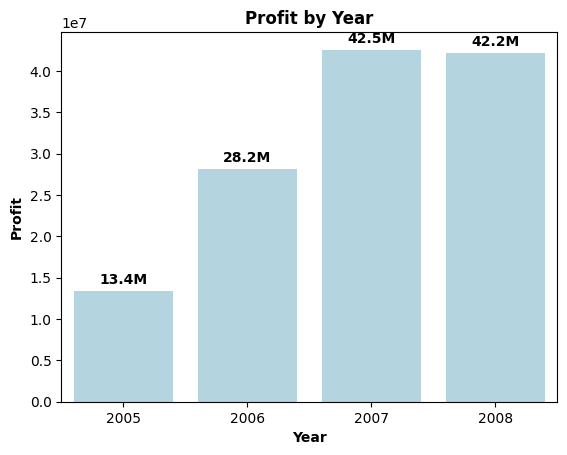

In [50]:
plt.Figure(figsize=(10,9))
ax = sns.barplot(df2, x= "CalendarYear", y="Profit",color="lightblue", estimator='sum', errorbar=None)
for container in ax.containers:
    ax.bar_label(container, labels=[f"{v.get_height()/1000000:.1f}M" for v in container],padding=3, fontsize=10,fontweight="bold")
plt.xlabel("Year", fontweight="bold")
plt.ylabel("Profit",fontweight="bold")
plt.title("Profit by Year",fontweight="bold")

In [51]:
df_melted= df2.melt(id_vars="CalendarYear",value_vars=['Profit', 'Revenue', 'COGS'], var_name="Metric",value_name="Value")

In [52]:
df_melted

,CalendarYear,Metric,Value
0,2005,Profit,1920264.18
1,2005,Profit,2059176.49
2,2005,Profit,2014440.62
3,2005,Profit,2102500.13
4,2005,Profit,2308995.44
...,...,...,...
106,2008,COGS,8982532.11
107,2008,COGS,9894635.83
108,2008,COGS,11691349.92
109,2008,COGS,11778018.50


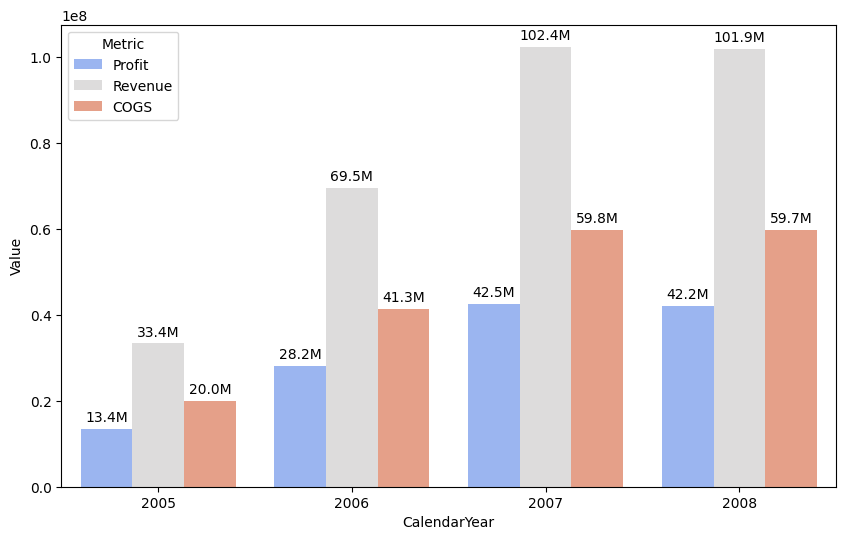

In [53]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_melted,x="CalendarYear",y="Value",hue="Metric",palette="coolwarm",estimator=sum,errorbar=None)
for container in ax.containers:
    ax.bar_label(container,labels=[f'{v.get_height()/1e6:.1f}M' for v in container],padding=3, fontsize=10)

In [67]:
df3=df_Time.groupby(["Month_Year","CalendarYear","MonthNumberOfYear"]).agg({"COGS":"sum","Revenue":"sum","Profit":"sum"}).reset_index()

In [68]:
df3

,Month_Year,CalendarYear,MonthNumberOfYear,COGS,Revenue,Profit
0,Apr-06,2006,4,4030681.82,6753887.32,2723205.50
1,Apr-07,2007,4,3087906.88,5304878.43,2216971.55
2,Apr-08,2008,4,9894635.83,16794232.98,6899597.15
3,Aug-05,2005,8,3062033.05,5121209.54,2059176.49
4,Aug-06,2006,8,3405447.39,5729914.29,2324466.90
5,Aug-07,2007,8,5092672.11,8744056.73,3651384.62
6,Dec-05,2005,12,4466095.65,7464381.97,2998286.32
7,Dec-06,2006,12,3580441.99,6151691.97,2571249.98
8,Dec-07,2007,12,10857166.15,18430986.53,7573820.38
9,Feb-06,2006,2,3494786.42,5821217.14,2326430.72


Text(0.5, 1.0, 'Profit by Month')

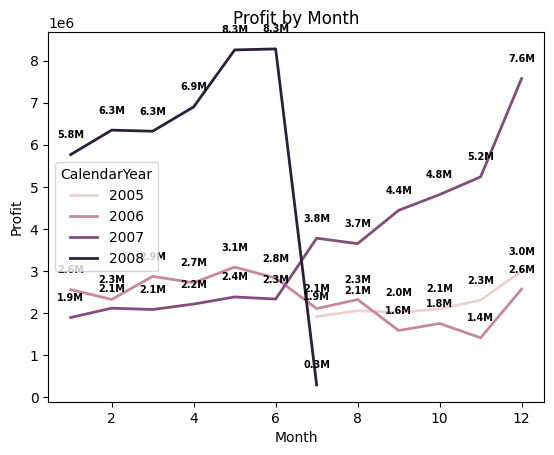

In [69]:
plt.Figure(figsize=(20,20))
ax =sns.lineplot(df3,x="MonthNumberOfYear", y="Profit", hue="CalendarYear",color ="purple",linewidth=2,markers='o')
for i, row in df3.iterrows():
    profit_m= row['Profit']/1000000
    ax.annotate(f"{profit_m:.1f}M",
                (row["MonthNumberOfYear"], row["Profit"]), textcoords="offset points",
                xytext=(0,12),
                ha="center",
                fontsize=7,
                fontweight="bold")
plt.xlabel("Month")
plt.ylabel("Profit")
plt.title("Profit by Month")

Text(0.5, 1.0, 'Profit by Month')

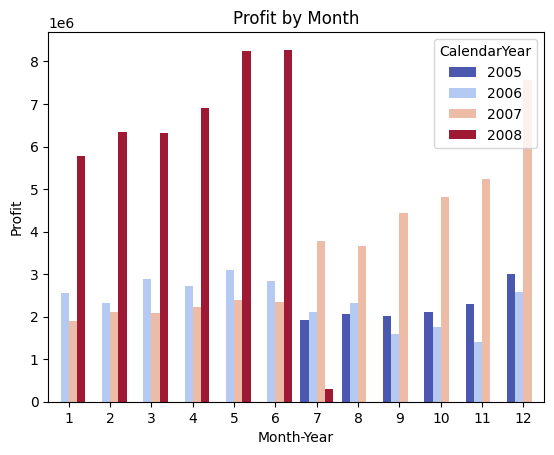

In [70]:
plt.Figure(figsize=(10,9))
ax =sns.barplot(df2,x="MonthNumberOfYear", y="Profit",hue="CalendarYear",palette="coolwarm",linewidth=2)
plt.xlabel("Month-Year")
plt.ylabel("Profit")
plt.title("Profit by Month")

In [71]:
df_Time["Weekday/Weekend"]= df_Time["DayNumberOfWeek"].apply(lambda x : "Weekday" if x in range(2,7) else "Weekend")

In [72]:
df_Time[["Weekday/Weekend","EnglishDayNameOfWeek"]].query('EnglishDayNameOfWeek != "Saturday" and EnglishDayNameOfWeek != "Sunday"')


,Weekday/Weekend,EnglishDayNameOfWeek
0,Weekday,Friday
8,Weekday,Monday
9,Weekday,Friday
10,Weekday,Friday
11,Weekday,Friday
...,...,...
60393,Weekday,Friday
60394,Weekday,Friday
60395,Weekday,Monday
60396,Weekday,Thursday


In [73]:
df4=df_Time.groupby(["EnglishDayNameOfWeek","DayNumberOfWeek"]).agg({"COGS":"sum","Revenue":"sum","Profit":"sum"}).reset_index()

In [74]:
df4['EnglishDayNameOfWeek']=df4['EnglishDayNameOfWeek'].str[:3]

In [104]:
df4= df4.sort_values("DayNumberOfWeek")

In [108]:
df4.query('Profit > 18000000 and COGS>25876034')

,EnglishDayNameOfWeek,DayNumberOfWeek,COGS,Revenue,Profit
4,Thu,5,27144921.52,45955381.13,18810459.61
0,Fri,6,26216323.92,44495924.62,18279600.70


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18712\3572019830.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax =sns.barplot(df4, x="EnglishDayNameOfWeek", y="Profit", palette="mako",estimator=sum,errorbar=None)


Text(0.5, 1.0, 'Weekday')

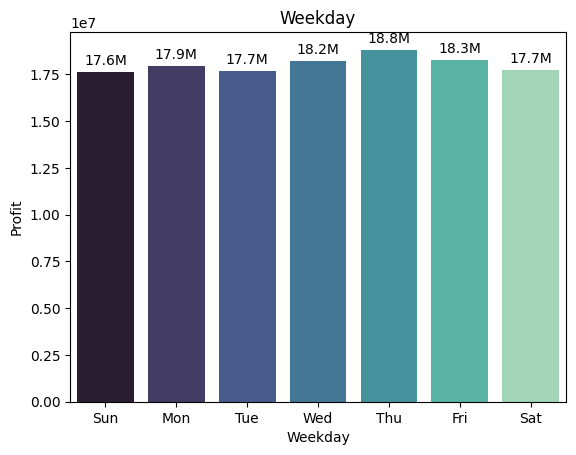

In [131]:
plt.Figure(figsize=(10,9))
ax =sns.barplot(df4, x="EnglishDayNameOfWeek", y="Profit", palette="mako",estimator=sum,errorbar=None)
for container in ax.containers:
    ax.bar_label(container,labels=[f'{v.get_height()/1e6:.1f}M' for v in container],padding=3, fontsize=10)
plt.xlabel("Weekday")
plt.ylabel("Profit")
plt.title("Weekday")